In [2]:
!pip install gspread==4.0.1

In [3]:
pip install xlrd

In [4]:
#library dataframe
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import xlrd


#library gdrive
import json
import gspread
from oauth2client.service_account import ServiceAccountCredentials

#ignore library
import warnings
warnings.filterwarnings('ignore')
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as pl

In [5]:
data_peserta = pd.read_csv('01_kepesertaan.csv', sep="|")
data_fktpkapitasi = pd.read_csv('02_fktpkapitasi.csv', sep="|")
data_fkrtl = pd.read_csv('03_fkrtl.csv', sep="|")
data_nonkapitasi = pd.read_csv('04_nonkapitasi.csv', sep="|")
data_diagnosissekunder = pd.read_csv('05_diagnosissekunder.csv', sep="|")

In [ ]:
#workbook = xlrd.open_workbook('DataKabupatenKota.xls')

In [ ]:
#worksheet = workbook.sheet_by_name('Data Kabupaten Kota')

In [ ]:
#worksheet = workbook.sheet_by_index(0)

In [6]:
#renamecoloumns
data_peserta = data_peserta.rename(columns= {'PSTV01':'Nomor_peserta','PSTV02':'Nomor_keluarga','PSTV03':'Tanggal_lahir',
                                              'PSTV04':'Hubungan_Keluarga','PSTV05':'Jenis_Kelamin','PSTV06':'Status_perkawinan',
                                             'PSTV07':'Kelas_rawat','PSTV08':'Segmentasi',
                                             'PSTV09':'Provinsi','PSTV10':'Kota','PSTV11':'Kepemilikan_faskes',
                                             'PSTV12':'Jenis_faskes','PSTV13':'Provinsi_faskes','PSTV14':'kota_faskes','PSTV15':'Bobot',
                                             'PSTV16':'Tahun_sampel','PSTV17':'Status_kepesertaan','PSTV18':'Tahun_Meninggal'})
data_fktpkapitasi = data_fktpkapitasi.rename(columns= {'PSTV01':'No_peserta','PSTV02':'No_keluarga','PSTV15':'Bobot',
                                            'FKP02':'ID_Kunjungan_FKTP','FKP03':'Tanggal_kunjungan_FKTP','FKP04':'Tanggal pulang_kunjungan_FKTP',
                                            'FKP05':'Provinsi_FKTP','FKP06':'Kabupaten/Kota_FKTP','FKP07':'Kepemilikan_FKTP','FKP08':'Jenis_FKTP','FKP09':'Tipe_FKTP',
                                            'FKP10':'Tingkat_Pelayanan_FKTP','FKP11':'Jenis_Poli_FKTP','FKP12':'Segmen_Peserta_FKTP','FKP13':'Status_Pulang_peserta',
                                            'FKP14':'Kode dan nama diagnosis ICD 10 (3 digit)','FKP14A':'Kode diagnosis ICD 10 (3 digit)','FKP15':'Kode diagnosis (beragam 3-5 digit)',
                                            'FKP15A':'Nama kode diagnosis FKP15','FKP16':'Provinsi faskes tujuan rujukan','FKP17':'Kabupaten/Kota faskes tujuan rujukan',
                                            'FKP18':'Kepemilikan faskes tujuan rujukan','FKP19':'Jenis faskes tujuan rujukan','FKP20':'Tipe faskes tujuan rujukan',
                                            'FKP21':'Poli faskes tujuan rujukan','FKP22':'Jenis Kunjungan FKTP'})
data_fkrtl = data_fkrtl.rename(columns= {'PSTV01':'Nomor peserta','PSTV02':'Nomor keluarga','PSTV15':'Bobot','FKP02':'No Asal Rujukan (ID Kunjungan FKTP)',
                                         'FKL02':'ID Kunjungan','FKL03':'Tanggal datang kunjungan FKRTL','FKL04':'Tanggal pulang kunjungan FKRTL',
                                         'FKL05':'Provinsi FKRTL','FKL06':'Kabupaten/Kota FKRTL','FKL07':'Kepemilikan FKRTL','FKL08':'Jenis FKRTL',
                                         'FKL09':'Tipe FKRTL','FKL10':'Tingkat Pelayanan FKRTL','FKL11':'Jenis Poli FKRTL','FKL12':'Segmen Peserta saat akses layanan FKRTL',
                                         'FKL13':'Kelas iuran premi peserta saat akses layanan FKRTL','FKL14':'Status pulang dari FKRTL',
                                         'FKL15':'Kode dan nama diagnosis masuk ICD 10 (3 digit)','FKL15A':'Kode diagnosis masuk ICD 10 (3 digit)',
                                         'FKL16':'Kode ICD 10 diagnosis masuk FKRTL (3-6digit)',
                                         'FKL16A':'Nama diagnosis masuk FKRTL (3-6digit)','FKL17':'Kode dan nama diagnosis primer ICD 10 (3 digit)',
                                         'FKL17A':'Kode diagnosis primer ICD 10 (3 digit)',
                                         'FKL18':'Kode ICD 10 diagnosis primer FKRTL (3-6digit)','FKL18A':'Nama diagnosis primer FKRTL (3-6digit)',
                                         'FKL19':'Kode INACBGs','FKL19A':'Deskripsi kode INACBGs','FKL20':'INACBGs - Kode Casemix main groups (Digit ke-1)',
                                         'FKL21':'INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2)',
                                         'FKL22':'INACBGs - Spesifikasi kelompok kasus (Digit ke-3)',
                                         'FKL23':'INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4)','FKL25':'Provinsi faskes perujuk',
                                         'FKL26':'Kabupaten/Kota faskes perujuk','FKL27':'Kepemilikan faskes perujuk',
                                         'FKL28':'Jenis faskes perujuk','FKL29':'Tipe faskes perujuk','FKL30':'Jenis prosedur',
                                         'FKL31':'Tarif regional INACBGs','FKL32':'Group Tarif INACBGs','FKL33':'Kode special sub-acute groups (SA)',
                                         'FKL34':'Tarif special sub-acute groups (SA)','FKL35':'Kode special procedures (SP)',
                                         'FKL36':'Deskripsi special procedures (SP)','FKL37':'Tarif special procedures (SP)','FKL38':'Kode special prosthesis (RR)',
                                         'FKL39':'Deskripsi special prosthesis (RR)','FKL40':'Tarif special prosthesis (RR)',
                                         'FKL41':'Kode special investigation(SI)','FKL42':'Deskripsi special investigation(SI)','FKL43':'Tarif special investigation(SI)',
                                         'FKL44':'Kode special drugs (SD)','FKL45':'Deskripsi special drugs (SD)',
                                         'FKL46':'Tarif special drugs (SD)','FKL47':'Biaya Tagih - oleh fasilitas kesehatan (provider)',
                                         'FKL48':'Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi'})
data_nonkapitasi = data_nonkapitasi.rename(columns= {'PSTV01':'Nomor Peserta','PSTV02':'Nomor keluarga','PSTV15':'Bobot','PNK02':'ID_Kunjungan','PNK03':'Tanggal_kunjungan',
                                                     'PNK04':'Tanggal_tindakan','PNK05':'Tanggal_pulang','PNK06':'Provinsi_faskes','PNK07':'Kode Kab/Kota faskes',
                                                     'PNK08':'Kepemilikan_faskes','PNK09':'Jenis_faskes','PNK10':'Tipe_faskes','PNK11':'Tingkat_layanan','PNK12':'Segmen_peserta',
                                                     'PNK13':'Kode dan Nama diagnosis berdasarkan ICD-10 (3 digit)','PNK13A':'Kode diagnosis berdasarkan ICD-10 (3 digit)',
                                                     'PNK14':'Kode diagnosis (3-5 digit)','PNK15':'Nama Diagnosis','PNK16':'Nama Tindakan','PNK17':'Biaya tagih','PNK18':'Biaya verifikasi'})

data_diagnosissekunder = data_diagnosissekunder.rename(columns= {'FKL02':'ID_Kunjungan','FKL24':'Kode_diagnosis','FKL24A':'Kode_diagnoisis ICD 10(3digit)',
                                                                 'FKL24B':'Kode dan nama diagnosis ICD 10 (3digit)'})


**Marge Data**

In [7]:
kunjunganMarge = pd.concat([data_fkrtl, data_fktpkapitasi],axis=1)
display(kunjunganMarge)

,Nomor peserta,Nomor keluarga,Bobot,No Asal Rujukan (ID Kunjungan FKTP),ID Kunjungan,Tanggal datang kunjungan FKRTL,Tanggal pulang kunjungan FKRTL,Provinsi FKRTL,Kabupaten/Kota FKRTL,Kepemilikan FKRTL,Jenis FKRTL,Tipe FKRTL,Tingkat Pelayanan FKRTL,Jenis Poli FKRTL,Segmen Peserta saat akses layanan FKRTL,Kelas iuran premi peserta saat akses layanan FKRTL,Status pulang dari FKRTL,Kode dan nama diagnosis masuk ICD 10 (3 digit),Kode diagnosis masuk ICD 10 (3 digit),Kode ICD 10 diagnosis masuk FKRTL (3-6digit),Nama diagnosis masuk FKRTL (3-6digit),Kode dan nama diagnosis primer ICD 10 (3 digit),Kode diagnosis primer ICD 10 (3 digit),Kode ICD 10 diagnosis primer FKRTL (3-6digit),Nama diagnosis primer FKRTL (3-6digit),Kode INACBGs,Deskripsi kode INACBGs,INACBGs - Kode Casemix main groups (Digit ke-1),INACBGs - Tipe kelompok kasus atau case groups (Digit ke-2),INACBGs - Spesifikasi kelompok kasus (Digit ke-3),INACBGs - Tingkat keparahan kelompok kasus(Digit ke-4),Provinsi faskes perujuk,Kabupaten/Kota faskes perujuk,Kepemilikan faskes perujuk,Jenis faskes perujuk,Tipe faskes perujuk,Jenis prosedur,Tarif regional INACBGs,Group Tarif INACBGs,Kode special sub-acute groups (SA),...,Kode special procedures (SP),Deskripsi special procedures (SP),Tarif special procedures (SP),Kode special prosthesis (RR),Deskripsi special prosthesis (RR),Tarif special prosthesis (RR),Kode special investigation(SI),Deskripsi special investigation(SI),Tarif special investigation(SI),Kode special drugs (SD),Deskripsi special drugs (SD),Tarif special drugs (SD),Biaya Tagih - oleh fasilitas kesehatan (provider),Biaya Verifikasi - BPJS Kesehatan setelah dilakukan verifikasi,No_peserta,No_keluarga,Bobot,ID_Kunjungan_FKTP,Tanggal_kunjungan_FKTP,Tanggal pulang_kunjungan_FKTP,Provinsi_FKTP,Kabupaten/Kota_FKTP,Kepemilikan_FKTP,Jenis_FKTP,Tipe_FKTP,Tingkat_Pelayanan_FKTP,Jenis_Poli_FKTP,Segmen_Peserta_FKTP,Status_Pulang_peserta,Kode dan nama diagnosis ICD 10 (3 digit),Kode diagnosis ICD 10 (3 digit),Kode diagnosis (beragam 3-5 digit),Nama kode diagnosis FKP15,Provinsi faskes tujuan rujukan,Kabupaten/Kota faskes tujuan rujukan,Kepemilikan faskes tujuan rujukan,Jenis faskes tujuan rujukan,Tipe faskes tujuan rujukan,Poli faskes tujuan rujukan,Jenis Kunjungan FKTP
0,8414195.0,8414195.0,186.467773,NaN,714302170001145,2017-02-20,2017-02-20,32.0,3214.0,9.0,1.0,7.0,1.0,6.0,5.0,2.0,1.0,270.0,D21,D219,Other benign neoplasm of connective and other ...,NaN,NaN,NaN,NaN,Q-5-44-0,NaN,17.0,5.0,44.0,1.0,32.0,3214.0,9.0,3.0,31.0,NaN,1.0,190400.0,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,190400.0,190400.0,81618143,141607507,22.586237,228204023,2017-05-06,2017-05-06,35,3522,9,3,2,1,13,2,98,9999,NaN,9999,9999,98,9998,98,98.0,98.0,98.0,2.0
1,56194485.0,56194485.0,166.297729,NaN,2480303170004933,2017-03-20,2017-03-20,12.0,1275.0,9.0,1.0,6.0,1.0,3.0,5.0,1.0,1.0,661.0,I69,I694,NaN,NaN,NaN,NaN,NaN,M-3-16-0,NaN,13.0,3.0,16.0,1.0,12.0,1212.0,3.0,1.0,28.0,NaN,3.0,120100.0,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,120100.0,120100.0,11197747,11197747,33.406620,389210553,2017-11-09,2017-11-09,31,3174,3,1,3,1,13,3,98,9999,NaN,9999,9999,98,9998,98,98.0,98.0,98.0,2.0
2,30433661.0,23630019.0,27.313589,NaN,123105170001015,2017-05-15,2017-05-15,74.0,7472.0,9.0,1.0,7.0,1.0,3.0,5.0,1.0,1.0,655.0,I63,I639,"Cerebral infarction, unspecified",NaN,NaN,NaN,NaN,Q-5-27-0,NaN,17.0,5.0,27.0,1.0,74.0,7472.0,9.0,2.0,8.0,NaN,3.0,145600.0,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,145600.0,145600.0,66801879,67883172,40.445122,220300531,2017-06-24,2017-06-24,12,1205,3,1,3,1,13,3,98,9999,NaN,9999,9999,98,9998,98,98.0,98.0,98.0,2.0
3,37896277.0,37896277.0,257.588165,NaN,123105170000044,2017-05-02,2017-05-02,74.0,7472.0,9.0,1.0,7.0,1.0,13.0,5.0,2.0,1.0,583.0,H60,H609,"Otitis externa, unspecified",NaN,NaN,NaN,NaN,Q-5-44-0,NaN,17.0,5.0,44.0,1.0,74.0,7402.0,3.0,1.0,28.0,NaN,3.0,192700.0,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,192700.0,192700.0,8994914,51537262,198.023514,70

In [8]:
kunjunganMarge.reset_index
kunjungan = kunjunganMarge[['Nomor peserta','ID Kunjungan','Provinsi FKRTL','Kabupaten/Kota FKRTL','Kelas iuran premi peserta saat akses layanan FKRTL',
                            'Kode diagnosis masuk ICD 10 (3 digit)','Nama diagnosis masuk FKRTL (3-6digit)','Biaya Tagih - oleh fasilitas kesehatan (provider)']]
display(kunjungan)

,Nomor peserta,ID Kunjungan,Provinsi FKRTL,Kabupaten/Kota FKRTL,Kelas iuran premi peserta saat akses layanan FKRTL,Kode diagnosis masuk ICD 10 (3 digit),Nama diagnosis masuk FKRTL (3-6digit),Biaya Tagih - oleh fasilitas kesehatan (provider)
0,8414195.0,714302170001145,32.0,3214.0,2.0,D21,Other benign neoplasm of connective and other ...,190400.0
1,56194485.0,2480303170004933,12.0,1275.0,1.0,I69,NaN,120100.0
2,30433661.0,123105170001015,74.0,7472.0,1.0,I63,"Cerebral infarction, unspecified",145600.0
3,37896277.0,123105170000044,74.0,7472.0,2.0,H60,"Otitis externa, unspecified",192700.0
4,30433661.0,123105170001940,74.0,7472.0,1.0,I63,"Cerebral infarction, unspecified",114100.0
...,...,...,...,...,...,...,...,...
3662115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
nonkapitasiMARGE = data_peserta.merge(data_nonkapitasi, left_on='Nomor_peserta', right_on='Nomor Peserta').sort_values(by='Nomor_peserta')
display(nonkapitasiMARGE)

,Nomor_peserta,Nomor_keluarga,Tanggal_lahir,Hubungan_Keluarga,Jenis_Kelamin,Status_perkawinan,Kelas_rawat,Segmentasi,Provinsi,Kota,Kepemilikan_faskes_x,Jenis_faskes_x,Provinsi_faskes_x,kota_faskes,Bobot_x,Tahun_sampel,Status_kepesertaan,Tahun_Meninggal,Nomor Peserta,Nomor keluarga,Bobot_y,ID_Kunjungan,Tanggal_kunjungan,Tanggal_tindakan,Tanggal_pulang,Provinsi_faskes_y,Kode Kab/Kota faskes,Kepemilikan_faskes_y,Jenis_faskes_y,Tipe_faskes,Tingkat_layanan,Segmen_peserta,Kode dan Nama diagnosis berdasarkan ICD-10 (3 digit),Kode diagnosis berdasarkan ICD-10 (3 digit),Kode diagnosis (3-5 digit),Nama Diagnosis,Nama Tindakan,Biaya tagih,Biaya verifikasi
0,64,64,1971-12-10,1,2,2,3,3,76,7603,3,1,76,7603,36.453136,2016,1,NaN,64,64,36.453136,222880318Y000045,2018-03-30,2018-03-30,2018-03-30,76,7603,3,1,4,1,3,790,Z30,Z309,"Contraceptive management, unspecified",1005,100000,100000
1,2452,177055403,1981-07-03,3,2,2,2,5,33,3323,9,3,33,3323,26.473171,2016,1,NaN,2452,177055403,26.473171,331140717Y000609,2017-07-07,2017-07-07,2017-07-07,33,3323,3,1,3,2,5,538,O80,O800,Spontaneous vertex delivery,2005,700000,700000
2,4253,211186118,1977-01-19,3,2,2,3,4,32,3206,9,2,32,3206,3.886934,2016,1,NaN,4253,211186118,3.886934,43870418Y000092,2018-04-17,2018-04-17,2018-04-17,32,3206,9,3,2,2,4,538,O80,O808,Other single spontaneous delivery,2012,700000,700000
3,4253,211186118,1977-01-19,3,2,2,3,4,32,3206,9,2,32,3206,3.886934,2016,1,NaN,4253,211186118,3.886934,43870518Y000148,2018-05-20,2018-05-20,2018-05-20,32,3206,9,3,2,1,4,799,Z39,Z392,Routine postpartum follow-up,1028,25000,25000
4,4253,211186118,1977-01-19,3,2,2,3,4,32,3206,9,2,32,3206,3.886934,2016,1,NaN,4253,211186118,3.886934,43870518Y000148,2018-05-20,2018-05-20,2018-05-20,32,3206,9,3,2,1,4,799,Z39,Z392,Routine postpartum follow-up,1027,25000,25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135252,237873826,239673335,1990-12-09,4,2,1,3,3,62,6202,3,1,62,6202,4.883359,2018,1,NaN,237873826,239673335,4.883359,217971218Y000071,2018-12-30,2018-12-30,2018-12-30,62,6202,3,1,3,2,3,538,O80,O80,Single spontaneous delivery,2012,700000,700000
135253,237922900,237922900,1990-06-10,1,2,2,3,3,11,1101,3,1,11,1101,2.441680,2018,1,NaN,237922900,237922900,2.441680,207380918P000169,2018-09-15,2018-09-15,2018-09-15,11,1101,9,2,1,1,3,794,Z34,Z348,Supervision of other normal pregnancy,1023,50000,50000
135254,238001183,266704764,1985-08-28,3,2,2,3,3,94,9108,3,1,94,9108,1.220840,2018,1,NaN,238001183,266704764,1.220840,296601218Y000598,2018-12-18,2018-12-18,2018-12-18,91,9108,3,1,3,2,3,538,O80,O800,Spontaneous vertex delivery,2012,700000,700000
135255,238002484,261927675,1974-10-06,3,2,2,3,3,11,1115,3,1,11,1115,2.826708,2018,1,NaN,238002484,261927675,2.826708,262031218Y001023,2018-12-14,2018-12-14,2018-12-14,11,1115,3,1,4,1,3,794,Z34,Z349,"Supervision of normal pregnancy, unspecified",1024,50000,50000


In [ ]:
#fkrtlkapitasiMARGE = data_peserta.merge(data_fktpkapitasi, left_on='Nomor_peserta', right_on='No_peserta').sort_values(by='Nomor_peserta')display(fkrtlkapitasiMARGE)

In [10]:
data_bpjsMARGE = pd.concat([kunjungan, nonkapitasiMARGE], axis=1)
data_bpjsMARGE.reset_index
display(data_bpjsMARGE)

,Nomor peserta,ID Kunjungan,Provinsi FKRTL,Kabupaten/Kota FKRTL,Kelas iuran premi peserta saat akses layanan FKRTL,Kode diagnosis masuk ICD 10 (3 digit),Nama diagnosis masuk FKRTL (3-6digit),Biaya Tagih - oleh fasilitas kesehatan (provider),Nomor_peserta,Nomor_keluarga,Tanggal_lahir,Hubungan_Keluarga,Jenis_Kelamin,Status_perkawinan,Kelas_rawat,Segmentasi,Provinsi,Kota,Kepemilikan_faskes_x,Jenis_faskes_x,Provinsi_faskes_x,kota_faskes,Bobot_x,Tahun_sampel,Status_kepesertaan,Tahun_Meninggal,Nomor Peserta,Nomor keluarga,Bobot_y,ID_Kunjungan,Tanggal_kunjungan,Tanggal_tindakan,Tanggal_pulang,Provinsi_faskes_y,Kode Kab/Kota faskes,Kepemilikan_faskes_y,Jenis_faskes_y,Tipe_faskes,Tingkat_layanan,Segmen_peserta,Kode dan Nama diagnosis berdasarkan ICD-10 (3 digit),Kode diagnosis berdasarkan ICD-10 (3 digit),Kode diagnosis (3-5 digit),Nama Diagnosis,Nama Tindakan,Biaya tagih,Biaya verifikasi
0,8414195.0,714302170001145,32.0,3214.0,2.0,D21,Other benign neoplasm of connective and other ...,190400.0,64.0,64.0,1971-12-10,1.0,2.0,2.0,3.0,3.0,76.0,7603.0,3.0,1.0,76.0,7603.0,36.453136,2016.0,1.0,NaN,64.0,64.0,36.453136,222880318Y000045,2018-03-30,2018-03-30,2018-03-30,76.0,7603.0,3.0,1.0,4.0,1.0,3.0,790.0,Z30,Z309,"Contraceptive management, unspecified",1005.0,100000.0,100000.0
1,56194485.0,2480303170004933,12.0,1275.0,1.0,I69,NaN,120100.0,2452.0,177055403.0,1981-07-03,3.0,2.0,2.0,2.0,5.0,33.0,3323.0,9.0,3.0,33.0,3323.0,26.473171,2016.0,1.0,NaN,2452.0,177055403.0,26.473171,331140717Y000609,2017-07-07,2017-07-07,2017-07-07,33.0,3323.0,3.0,1.0,3.0,2.0,5.0,538.0,O80,O800,Spontaneous vertex delivery,2005.0,700000.0,700000.0
2,30433661.0,123105170001015,74.0,7472.0,1.0,I63,"Cerebral infarction, unspecified",145600.0,4253.0,211186118.0,1977-01-19,3.0,2.0,2.0,3.0,4.0,32.0,3206.0,9.0,2.0,32.0,3206.0,3.886934,2016.0,1.0,NaN,4253.0,211186118.0,3.886934,43870418Y000092,2018-04-17,2018-04-17,2018-04-17,32.0,3206.0,9.0,3.0,2.0,2.0,4.0,538.0,O80,O808,Other single spontaneous delivery,2012.0,700000.0,700000.0
3,37896277.0,123105170000044,74.0,7472.0,2.0,H60,"Otitis externa, unspecified",192700.0,4253.0,211186118.0,1977-01-19,3.0,2.0,2.0,3.0,4.0,32.0,3206.0,9.0,2.0,32.0,3206.0,3.886934,2016.0,1.0,NaN,4253.0,211186118.0,3.886934,43870518Y000148,2018-05-20,2018-05-20,2018-05-20,32.0,3206.0,9.0,3.0,2.0,1.0,4.0,799.0,Z39,Z392,Routine postpartum follow-up,1028.0,25000.0,25000.0
4,30433661.0,123105170001940,74.0,7472.0,1.0,I63,"Cerebral infarction, unspecified",114100.0,4253.0,211186118.0,1977-01-19,3.0,2.0,2.0,3.0,4.0,32.0,3206.0,9.0,2.0,32.0,3206.0,3.886934,2016.0,1.0,NaN,4253.0,211186118.0,3.886934,43870518Y000148,2018-05-20,2018-05-20,2018-05-20,32.0,3206.0,9.0,3.0,2.0,1.0,4.0,799.0,Z39,Z392,Routine postpartum follow-up,1027.0,25000.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_bpjs = data_bpjsMARGE[['Nomor_peserta','Tanggal_lahir','Jenis_Kelamin','Provinsi','Kota','Kelas_rawat','ID Kunjungan','Kelas iuran premi peserta saat akses layanan FKRTL',
                            'Kode diagnosis masuk ICD 10 (3 digit)','Biaya Tagih - oleh fasilitas kesehatan (provider)','Kode diagnosis (3-5 digit)','Nama Diagnosis','Nama Tindakan','Biaya tagih']]

In [12]:
data_bpjs.reset_index

<bound method DataFrame.reset_index of          Nomor_peserta Tanggal_lahir  ...  Nama Tindakan  Biaya tagih
0                 64.0    1971-12-10  ...         1005.0     100000.0
1               2452.0    1981-07-03  ...         2005.0     700000.0
2               4253.0    1977-01-19  ...         2012.0     700000.0
3               4253.0    1977-01-19  ...         1028.0      25000.0
4               4253.0    1977-01-19  ...         1027.0      25000.0
...                ...           ...  ...            ...          ...
3662115            NaN           NaN  ...            NaN          NaN
3662116            NaN           NaN  ...            NaN          NaN
3662117            NaN           NaN  ...            NaN          NaN
3662118            NaN           NaN  ...            NaN          NaN
3662119            NaN           NaN  ...            NaN          NaN

[3662120 rows x 14 columns]>

In [13]:
now = pd.to_datetime('now')
now
data_bpjs["Tanggal_lahir"] = pd.to_datetime(data_bpjs["Tanggal_lahir"])
data_bpjs["usia"] = data_bpjs["Tanggal_lahir"].apply(lambda x : (pd.datetime.now().year - x.year))
data_bpjs.drop(['Tanggal_lahir'], axis=1, inplace=True)

In [14]:
data_bpjs.reset_index(drop=True)

,Nomor_peserta,Jenis_Kelamin,Provinsi,Kota,Kelas_rawat,ID Kunjungan,Kelas iuran premi peserta saat akses layanan FKRTL,Kode diagnosis masuk ICD 10 (3 digit),Biaya Tagih - oleh fasilitas kesehatan (provider),Kode diagnosis (3-5 digit),Nama Diagnosis,Nama Tindakan,Biaya tagih,usia
0,64.0,2.0,76.0,7603.0,3.0,714302170001145,2.0,D21,190400.0,Z309,"Contraceptive management, unspecified",1005.0,100000.0,50.0
1,2452.0,2.0,33.0,3323.0,2.0,2480303170004933,1.0,I69,120100.0,O800,Spontaneous vertex delivery,2005.0,700000.0,40.0
2,4253.0,2.0,32.0,3206.0,3.0,123105170001015,1.0,I63,145600.0,O808,Other single spontaneous delivery,2012.0,700000.0,44.0
3,4253.0,2.0,32.0,3206.0,3.0,123105170000044,2.0,H60,192700.0,Z392,Routine postpartum follow-up,1028.0,25000.0,44.0
4,4253.0,2.0,32.0,3206.0,3.0,123105170001940,1.0,I63,114100.0,Z392,Routine postpartum follow-up,1027.0,25000.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Convert Data Jenis kelamin
data_bpjs['Jenis_Kelamin'] = data_bpjs['Jenis_Kelamin'].astype(str)
data_bpjs['Provinsi'] = data_bpjs['Provinsi'].astype(str)
data_bpjs['Kelas_rawat'] = data_bpjs['Kelas_rawat'].astype(str)
data_bpjs['Kelas iuran premi peserta saat akses layanan FKRTL'] = data_bpjs['Kelas iuran premi peserta saat akses layanan FKRTL'].astype(str)

In [16]:
#Dictonary Jenis kelamin
dictKelamin = {'1.0':'Laki-laki','2.0':'Perempuan'}

#Dictonary Provinsi
dictProv = {'11.0':'Aceh',
            '12.0':'Sumatera Utara',
            '13.0':'Sumatera Barat',
            '14.0':'Riau',
            '15.0':'Jambi',
            '16.0':'Sumatera Selatan',
            '17.0':'Bengkulu','18':'Lampung',
            '19.0':'Kepulauan Bangka Belitung',
            '21.0':'Kepulauan Riau',
            '31.0':'DKI Jakarta',
            '32.0':'Jawa Barat',
            '33.0':'Jawa Tengah',
            '34.0':'DI Yogyakarta',
            '35.0':'Jawa Timur',
            '36.0':'Banten',
            '51.0':'Bali',
            '52.0':'Nusa Tenggara Barat',
            '53.0':'Nusa Tenggara Timur',
            '61.0':'Kalimantan Barat',
            '62.0':'Kalimantan Tengah',
            '63.0':'Kalimantan Selatan',
            '64.0':'Kalimantan Timur',
            '65.0':'Kalimantan Utara',
            '71.0':'Sulawesi Utara',
            '72.0':'Sulawesi Tengah',
            '73.0':'Sulawesi Selatan',
            '74.0':'Sulawesi Tenggara',
            '75.0':'Gorontalo',
            '76.0':'Sulawesi Barat',
            '81.0':'Maluku','82':'Maluku Utara',
            '91.0':'Papua Barat',
            '94.0':'Papua','99':'Tidak terdefinisi'}
dictKelasRawat = {'1.0':'KelasI','2.0':'KelasII',
'3.0':'KelasIII','9.0':'Missing'}
dictPremi = {'1.0':'I','2.0':'II','3.0':'III'}
            
#Penambahan Data Dictonary Jenis kelamin ke dalam column
data_bpjs['jenis_kelamin'] = data_bpjs['Jenis_Kelamin'].map(dictKelamin)
data_bpjs['provinsi'] = data_bpjs['Provinsi'].map(dictProv)
data_bpjs['kelas_rawat'] = data_bpjs['Kelas_rawat'].map(dictKelasRawat)
data_bpjs['Kelas_iuran_premi'] = data_bpjs['Kelas iuran premi peserta saat akses layanan FKRTL'].map(dictPremi)

In [17]:
data_bpjs.reset_index
data_bpjs.drop(['Provinsi','Jenis_Kelamin','Kota'], axis=1, inplace=True)
data_bpjs.head()
#data_bpjs.to_csv('data_fil.csv')

,Nomor_peserta,Kelas_rawat,ID Kunjungan,Kelas iuran premi peserta saat akses layanan FKRTL,Kode diagnosis masuk ICD 10 (3 digit),Biaya Tagih - oleh fasilitas kesehatan (provider),Kode diagnosis (3-5 digit),Nama Diagnosis,Nama Tindakan,Biaya tagih,usia,jenis_kelamin,provinsi,kelas_rawat,Kelas_iuran_premi
0,64.0,3.0,714302170001145,2.0,D21,190400.0,Z309,"Contraceptive management, unspecified",1005.0,100000.0,50.0,Perempuan,Sulawesi Barat,KelasIII,II
1,2452.0,2.0,2480303170004933,1.0,I69,120100.0,O800,Spontaneous vertex delivery,2005.0,700000.0,40.0,Perempuan,Jawa Tengah,KelasII,I
2,4253.0,3.0,123105170001015,1.0,I63,145600.0,O808,Other single spontaneous delivery,2012.0,700000.0,44.0,Perempuan,Jawa Barat,KelasIII,I
3,4253.0,3.0,123105170000044,2.0,H60,192700.0,Z392,Routine postpartum follow-up,1028.0,25000.0,44.0,Perempuan,Jawa Barat,KelasIII,II
4,4253.0,3.0,123105170001940,1.0,I63,114100.0,Z392,Routine postpartum follow-up,1027.0,25000.0,44.0,Perempuan,Jawa Barat,KelasIII,I


In [18]:
data_bpjs.reset_index

<bound method DataFrame.reset_index of          Nomor_peserta Kelas_rawat  ... kelas_rawat Kelas_iuran_premi
0                 64.0         3.0  ...    KelasIII                II
1               2452.0         2.0  ...     KelasII                 I
2               4253.0         3.0  ...    KelasIII                 I
3               4253.0         3.0  ...    KelasIII                II
4               4253.0         3.0  ...    KelasIII                 I
...                ...         ...  ...         ...               ...
3662115            NaN         nan  ...         NaN               NaN
3662116            NaN         nan  ...         NaN               NaN
3662117            NaN         nan  ...         NaN               NaN
3662118            NaN         nan  ...         NaN               NaN
3662119            NaN         nan  ...         NaN               NaN

[3662120 rows x 15 columns]>

In [44]:
data_bpjs['provinsi'].value_counts()

Jawa Tengah                  32282
Jawa Timur                   25272
Jawa Barat                   14638
Sulawesi Selatan              6852
Aceh                          4927
DI Yogyakarta                 3666
Banten                        3362
Sumatera Utara                3361
Sulawesi Tenggara             2838
Sumatera Barat                2767
Nusa Tenggara Timur           2480
Bengkulu                      2465
Sulawesi Tengah               2320
Sumatera Selatan              2312
Nusa Tenggara Barat           2262
Kalimantan Selatan            2215
Kalimantan Barat              2201
Sulawesi Barat                1858
Jambi                         1807
DKI Jakarta                   1674
Gorontalo                     1319
Bali                          1317
Riau                          1183
Sulawesi Utara                 985
Kepulauan Riau                 972
Kalimantan Timur               790
Kalimantan Tengah              681
Kepulauan Bangka Belitung      545
Papua Barat         

In [19]:
data_bpjs['Nama Diagnosis'].value_counts()

Non-insulin-dependent diabetes mellitus without complications    26864
Essential (primary) hypertension                                 14080
Routine postpartum follow-up                                      9862
Single spontaneous delivery, unspecified                          8412
Contraceptive management, unspecified                             7157
                                                                 ...  
Other disorders of refraction                                        1
Balanced translocation and insertion in normal individual            1
Peritonitis, unspecified                                             1
Other specified chronic obstructive pulmonary disease                1
Other chest pain                                                     1
Name: Nama Diagnosis, Length: 1326, dtype: int64

In [38]:
rslt_df = data_bpjs[data_bpjs['Nama Diagnosis'] == 'Non-insulin-dependent diabetes mellitus without complications']
rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26864 entries, 22 to 134613
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Nomor_peserta                                       26864 non-null  float64
 1   Kelas_rawat                                         26864 non-null  object 
 2   ID Kunjungan                                        26864 non-null  object 
 3   Kelas iuran premi peserta saat akses layanan FKRTL  26864 non-null  object 
 4   Kode diagnosis masuk ICD 10 (3 digit)               22863 non-null  object 
 5   Biaya Tagih - oleh fasilitas kesehatan (provider)   26864 non-null  float64
 6   Kode diagnosis (3-5 digit)                          26864 non-null  object 
 7   Nama Diagnosis                                      26864 non-null  object 
 8   Nama Tindakan                                       26864 non-null  float6

In [49]:
rslt_df.head(2)

,Nomor_peserta,Kelas_rawat,ID Kunjungan,Kelas iuran premi peserta saat akses layanan FKRTL,Kode diagnosis masuk ICD 10 (3 digit),Biaya Tagih - oleh fasilitas kesehatan (provider),Kode diagnosis (3-5 digit),Nama Diagnosis,Nama Tindakan,Biaya tagih,usia,jenis_kelamin,provinsi,kelas_rawat,Kelas_iuran_premi
22,27551.0,2.0,123105170001542,1.0,I64,114100.0,E119,Non-insulin-dependent diabetes mellitus withou...,5050.0,20000.0,44.0,Laki-laki,Jawa Tengah,KelasII,I
23,27551.0,2.0,4276602170000095,1.0,O21,311300.0,E119,Non-insulin-dependent diabetes mellitus withou...,5049.0,20000.0,44.0,Laki-laki,Jawa Tengah,KelasII,I


In [65]:
rslt_df.to_csv('file_name.csv', index=False)

In [57]:
rslt_df['Kelas_iuran_premi'].value_counts()

III    9995
II     9534
I      7282
Name: Kelas_iuran_premi, dtype: int64

In [66]:
#df = rslt_df[['Nomor_peserta','Kode diagnosis masuk ICD 10 (3 digit)','Nama Tindakan','usia','jenis_kelamin','provinsi','kelas_rawat','Biaya tagih']]

In [69]:
#df.to_csv('diabet0.csv', index=False)

# **Modelling**

In [70]:
df = rslt_df[['Kode diagnosis masuk ICD 10 (3 digit)','Nama Tindakan','usia','jenis_kelamin','provinsi','kelas_rawat','Biaya tagih']]

df.head(2)

,Kode diagnosis masuk ICD 10 (3 digit),Nama Tindakan,usia,jenis_kelamin,provinsi,kelas_rawat,Biaya tagih
22,I64,5050.0,44.0,Laki-laki,Jawa Tengah,KelasII,20000.0
23,O21,5049.0,44.0,Laki-laki,Jawa Tengah,KelasII,20000.0


In [90]:
df['Kode diagnosis masuk ICD 10 (3 digit)'] = df['Kode diagnosis masuk ICD 10 (3 digit)'].str[0]

for col in df.columns:
  if col not in ['usia','Biaya tagih']:
    if col in ['kelas_rawat']:
      df['kelas_rawat'] = df['kelas_rawat'].map({'KelasII':2, 'KelasIII':1, 'KelasI':3, 'Missing':0})
    else:
      df = pd.concat([df, pd.get_dummies(df[col])], axis=1)
      df = df.drop([col], axis=1)

df.head(3) 

,usia,kelas_rawat,Biaya tagih,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,V,W,X,Y,Z,5022.0,5023.0,5048.0,5049.0,5050.0,5051.0,5052.0,5053.0,5054.0,5055.0,5056.0,9001.0,Laki-laki,Perempuan,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,Jawa Timur,Kalimantan Barat,Kalimantan Selatan,Kalimantan Tengah,Kalimantan Timur,Kalimantan Utara,Kepulauan Bangka Belitung,Kepulauan Riau,Nusa Tenggara Barat,Nusa Tenggara Timur,Papua,Papua Barat,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
22,44.0,2,20000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,44.0,2,20000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,59.0,1,30000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.model_selection import train_test_split

X = df.drop(['Biaya tagih'], axis=1)
y = df['Biaya tagih']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## **Linear Regressioin**

In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [93]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

y_predict = model_linear.predict(x_test)
print(f"R^2 Score : {r2_score(y_test, y_predict)}")
print(f"Mean Absoulted Error : {mean_absolute_error(y_test, y_predict)}")
print(f"Mean Squared Error : {mean_squared_error(y_test, y_predict)}")

R^2 Score : 0.9918300748502579
Mean Absoulted Error : 1540.0548916525536
Mean Squared Error : 10567545.037464993


## **Decison Tree Regressor**

In [94]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)

y_predict = model_tree.predict(x_test)
print(f"R^2 Score : {r2_score(y_test, y_predict)}")
print(f"Mean Absoulted Error : {mean_absolute_error(y_test, y_predict)}")
print(f"Mean Squared Error : {mean_squared_error(y_test, y_predict)}")

R^2 Score : 0.9902249336856945
Mean Absoulted Error : 587.8338569014169
Mean Squared Error : 12643745.398804601


In [71]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

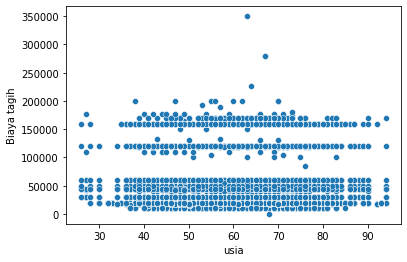

In [85]:
# Draw the scatter plot
sns.scatterplot(x="usia",
                y="Biaya tagih",
                data=df)

# Plot it
plt.show()

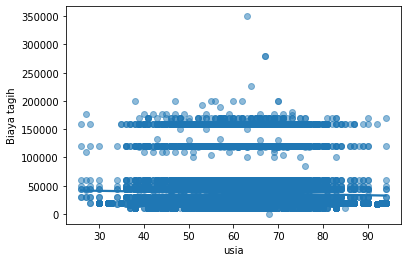

In [100]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience 
sns.regplot(x="usia",
            y="Biaya tagih",
            data=df,
            ci=None,
            scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

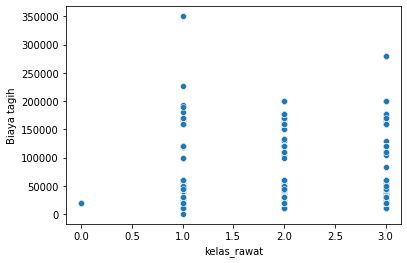

In [103]:
# Draw the scatter plot
sns.scatterplot(x='kelas_rawat',
                y="Biaya tagih",
                data=df)

# Plot it
plt.show()

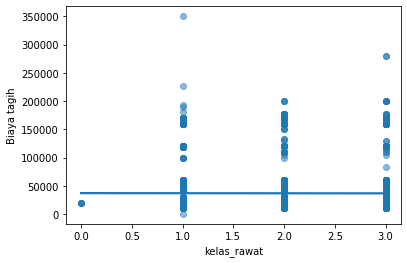

In [104]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience 
sns.regplot(x="kelas_rawat",
            y="Biaya tagih",
            data=df,
            ci=None,
            scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

In [112]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_cost_by_age = df.groupby("usia")["Biaya tagih"].mean()

# Print the result
print(mean_cost_by_age)

usia
26.0    67500.000000
27.0    67500.000000
28.0    58000.000000
30.0    27272.727273
32.0    20000.000000
            ...     
89.0    35500.000000
90.0    31515.151515
92.0    25000.000000
93.0    20000.000000
94.0    34444.444444
Name: Biaya tagih, Length: 66, dtype: float64


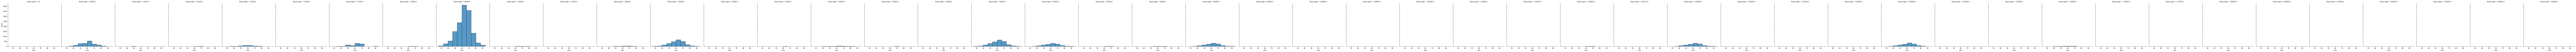

In [114]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=df,
            x="usia",
            col="Biaya tagih",
            bins=10)

# Show the plot
plt.show()